In [1]:
#importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # For missing value imputation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
import pandas as pd

# Define the file path
file_path = "../Data_Set/new_df_without_outliers_copy_smote_resampled.xlsx"

# Load the xlsx file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,1.349487,0,1,-0.580455,0.629251,-0.317312,0.263730,-0.974068,0
1,0.149555,0,0,-0.241118,0.629251,-1.649552,-1.579747,-0.974068,0
2,-1.050377,0,0,-0.241118,-0.272192,0.082360,0.263730,1.211318,0
3,-0.681167,0,0,-0.857661,-0.973313,0.015748,0.331039,-0.974068,0
4,1.164882,1,1,-1.384988,-1.173634,0.015748,0.331039,1.211318,0
...,...,...,...,...,...,...,...,...,...
181139,1.349487,0,0,-0.261522,0.979109,-0.628168,1.103451,1.211318,1
181140,1.349487,0,0,-0.241118,-0.172031,0.015748,0.624467,-0.399610,1
181141,-0.727318,0,0,-0.241061,1.025419,0.104564,0.763605,1.211318,1
181142,0.334160,0,0,-0.241118,0.045409,0.015748,-1.579747,1.211318,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('diabetes', axis=1), df['diabetes'], test_size=0.2, random_state=42)

In [16]:
#this code is training a random forest regression model 
model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=42)

In [17]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.08817300489627453
R-squared: 0.6473078619139949


In [18]:
import matplotlib.pyplot as plt

In [19]:
# Get feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = list(df.drop('diabetes', axis=1).columns)

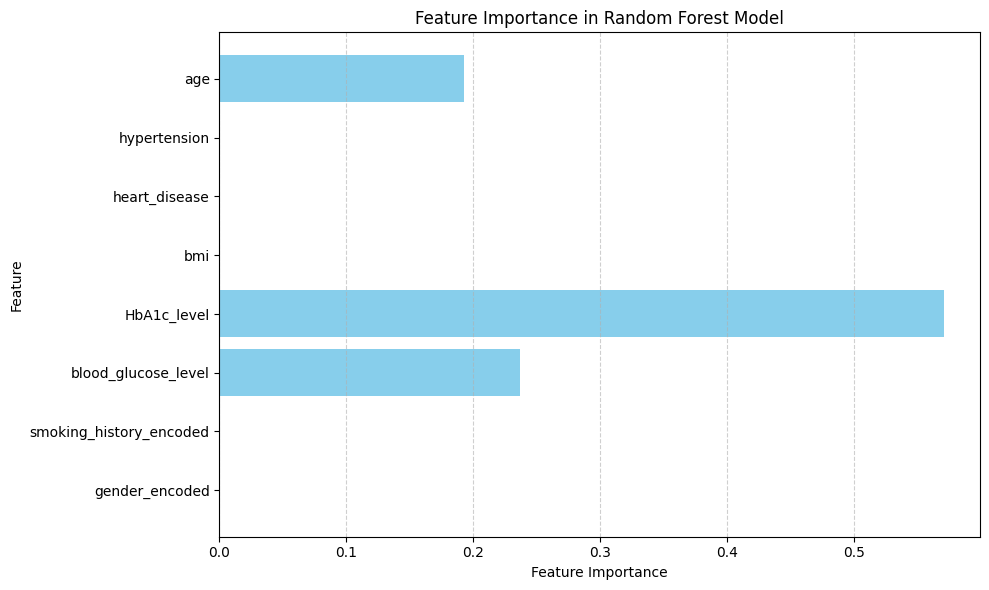

In [20]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Arrange features with highest importance on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
correlation_matrix = df.corr()

correlation_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
age,1.000000,0.183514,0.173931,0.312751,0.276858,0.244342,0.335574,0.004806,0.492171
hypertension,0.183514,1.000000,0.066963,0.074569,0.041947,0.042076,0.095923,0.000776,0.072463
heart_disease,0.173931,0.066963,1.000000,0.016537,0.026629,0.020477,0.057595,0.068466,0.046080
bmi,0.312751,0.074569,0.016537,1.000000,0.200837,0.173537,0.251095,-0.006502,0.352016
HbA1c_level,0.276858,0.041947,0.026629,0.200837,1.000000,0.273675,0.155874,0.047382,0.575671
blood_glucose_level,0.244342,0.042076,0.020477,0.173537,0.273675,1.000000,0.120721,0.044813,0.475938
smoking_history_encoded,0.335574,0.095923,0.057595,0.251095,0.155874,0.120721,1.000000,0.029031,0.277097
gender_encoded,0.004806,0.000776,0.068466,-0.006502,0.047382,0.044813,0.029031,1.000000,0.077795
diabetes,0.492171,0.072463,0.046080,0.352016,0.575671,0.475938,0.277097,0.077795,1.000000


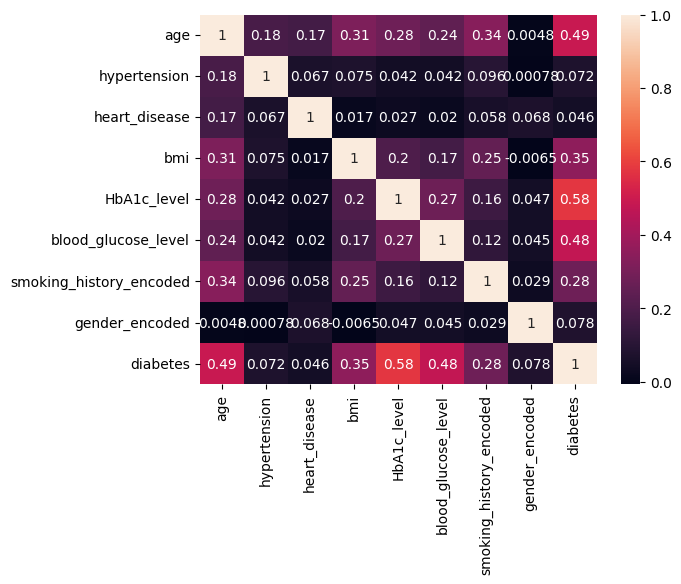

In [22]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [23]:
#the features with most importance is HbA1c, blood_glucose_level, and age 

#making a dataframe with those values only 

import pandas as pd

# Assuming your data is loaded into a pandas DataFrame named 'data'

# List of features you want to select (replace with your actual feature names)
selected_features = ['HbA1c_level', 'blood_glucose_level', 'age','diabetes']

# Create a new DataFrame with only the selected features
df_selected_with_diabetes = df[selected_features]

df_selected_with_diabetes

,HbA1c_level,blood_glucose_level,age,diabetes
0,0.629251,-0.317312,1.349487,0
1,0.629251,-1.649552,0.149555,0
2,-0.272192,0.082360,-1.050377,0
3,-0.973313,0.015748,-0.681167,0
4,-1.173634,0.015748,1.164882,0
...,...,...,...,...
181139,0.979109,-0.628168,1.349487,1
181140,-0.172031,0.015748,1.349487,1
181141,1.025419,0.104564,-0.727318,1
181142,0.045409,0.015748,0.334160,1


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_selected_with_diabetes[['HbA1c_level', 'blood_glucose_level', 'age']], df_selected_with_diabetes['diabetes'], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model (replace with desired evaluation metric)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

#evaluate the model using f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1 Score:", f1)

#evaluate the model using precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Logistic Regression Precision Score:", precision)

#evaluate the model using recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Logistic Regression Recall Score:", recall)

Logistic Regression Accuracy: 0.8558613265615943
Logistic Regression F1 Score: 0.8575636899241722
Logistic Regression Precision Score: 0.8470740381506627
Logistic Regression Recall Score: 0.8683163941670349


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets (same as logistic regression)
X_train, X_test, y_train, y_test = train_test_split(df_selected_with_diabetes[['HbA1c_level', 'blood_glucose_level', 'age']], df_selected_with_diabetes['diabetes'], test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

#evaluating the model using precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Decision Tree Precision:", precision)

#evaluating the model using recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Decision Tree Recall:", recall)

#evaluating the model using F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Decision Tree F1 Score:", f1)

Decision Tree Accuracy: 0.9746335808330343
Decision Tree Precision: 0.9864138126238324
Decision Tree Recall: 0.9624944763588157
Decision Tree F1 Score: 0.97430736112276


In [27]:
df_selected_with_diabetes

,HbA1c_level,blood_glucose_level,age,diabetes
0,0.629251,-0.317312,1.349487,0
1,0.629251,-1.649552,0.149555,0
2,-0.272192,0.082360,-1.050377,0
3,-0.973313,0.015748,-0.681167,0
4,-1.173634,0.015748,1.164882,0
...,...,...,...,...
181139,0.979109,-0.628168,1.349487,1
181140,-0.172031,0.015748,1.349487,1
181141,1.025419,0.104564,-0.727318,1
181142,0.045409,0.015748,0.334160,1


In [28]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
# Assuming you have a dataset df containing your features and target variable
X_rf = df_selected_with_diabetes.drop(columns=['diabetes'])  # Features
y_rf= df['diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = model.predict(X_test_rf)

mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 0.01548700484208811
R-squared: 0.9380519598177474
